**Table of contents**       
  - Libraries    
  - Loading, cleaning and exploring the data    
    - Modifying column names    
    - Renaming column names, replacing categories' names    
    - Changing data type    
    - Exploring categories' frequency among object columns    
    - Grouping the data    
  - Visualization    
    - Exploring average total bill by Day of week and sex
    - Exploring relationship between total bill and tip 
  - Modeling    
    - Data partition    
    - Modifying y_train and y_test to make the variable normally distributed    
    - Getting dummy variables    
    - Model output    
    - Improving the model - unselecting variables    
    - Prediction for the test set    
    - MAE and MAPE metrics    
    - Residuals plot and standarized residuals density function plot    
    - Improving the model - changing the Tip variable to natural logarithm to reduce outliers in this variable    
    - Model output    
    - Prediction for the test set, standarizing residuals    
    - MAE and MAPE metrics    
    - Residuals plot and standarized residuals density function plot    
  - Conclusion:    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=1
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Linear Model Project - Predicting Total Bill from The tips Data Set

### Libraries

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

### Loading, cleaning and exploring the data

In [399]:
df = sns.load_dataset("tips")

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [401]:
np.sum(df.isna().sum())

0

#### Modifying column names

In [402]:
df.columns = [column.capitalize() for column in df.columns]

#### Renaming column names, replacing categories' names

In [403]:
df.rename(columns = {"Day":"Day_of_week"},inplace=True)

In [404]:
df["Day_of_week"].replace({"Sat":"Saturday",
                           "Sun":"Sunday",
                           "Thur":"Thursday",
                           "Fri":"Friday"},inplace=True)

#### Changing data type

In [405]:
for col in df.select_dtypes("category").columns.to_list():
    df[col] = df[col].astype("object")

In [406]:
df.dtypes

Total_bill     float64
Tip            float64
Sex             object
Smoker          object
Day_of_week     object
Time            object
Size             int64
dtype: object

#### Exploring categories' frequency among object columns

In [407]:
for col in df.select_dtypes("object").columns.to_list():
    print(f'Column: {col}\nValue counts:\n\n{df[col].value_counts()}\n')

Column: Sex
Value counts:

Male      157
Female     87
Name: Sex, dtype: int64

Column: Smoker
Value counts:

No     151
Yes     93
Name: Smoker, dtype: int64

Column: Day_of_week
Value counts:

Saturday    87
Sunday      76
Thursday    62
Friday      19
Name: Day_of_week, dtype: int64

Column: Time
Value counts:

Dinner    176
Lunch      68
Name: Time, dtype: int64



#### Grouping the data

In [408]:
df.groupby(["Sex","Day_of_week"])["Total_bill"].mean().reset_index(name="Average_total_bill").round(2)

,Sex,Day_of_week,Average_total_bill
0,Female,Friday,14.15
1,Female,Saturday,19.68
2,Female,Sunday,19.87
3,Female,Thursday,16.72
4,Male,Friday,19.86
5,Male,Saturday,20.80
6,Male,Sunday,21.89
7,Male,Thursday,18.71


### Visualization

#### Exploring average total bill by Day of week and sex

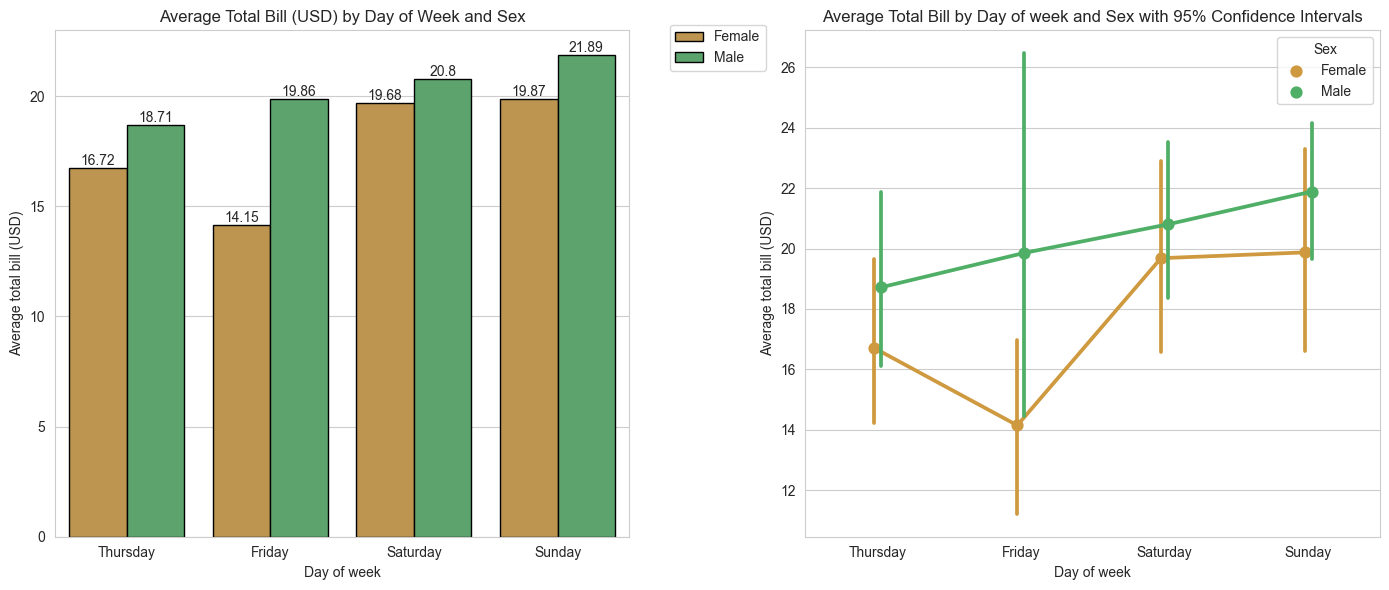

In [409]:
sns.set_style(style="whitegrid")


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,6))
axes = axes.flatten()

bar = sns.barplot(data=df.groupby(["Sex","Day_of_week"])["Total_bill"].mean().reset_index(name="Average_total_bill").round(2),
            x="Day_of_week",
            y="Average_total_bill",
            hue="Sex",
            edgecolor="black",
            order = ["Thursday","Friday","Saturday","Sunday"],
            palette = ["#CF9A3F","#50AF67"],
            ax = axes[0])
for container in bar.containers:
    axes[0].bar_label(container)
axes[0].legend(bbox_to_anchor=(1.25,1.025))
axes[0].set_title("Average Total Bill (USD) by Day of Week and Sex")
axes[0].set_xlabel("Day of week")
axes[0].set_ylabel("Average total bill (USD)")

sns.pointplot(data = df,
            x="Day_of_week",
            y="Total_bill",
            hue="Sex",
            dodge=True,
            order = ["Thursday","Friday","Saturday","Sunday"],
            palette = ["#CF9A3F","#50AF67"],
            ax=axes[1])
axes[1].set_title("Average Total Bill by Day of week and Sex with 95% Confidence Intervals")
axes[1].set_xlabel("Day of week")
axes[1].set_ylabel("Average total bill (USD)")



plt.tight_layout()
plt.show()

#### Exploring relationship between total bill and tip 

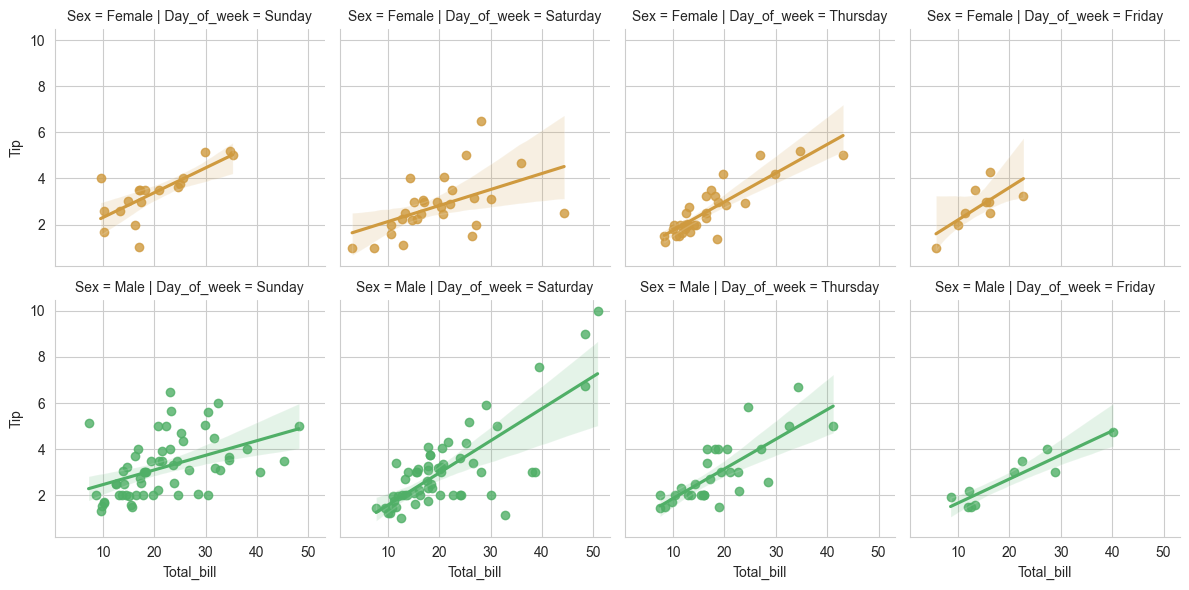

In [410]:
g = sns.FacetGrid(df, col="Day_of_week",  row="Sex",hue="Sex",palette = ["#CF9A3F","#50AF67"])
g.map(sns.regplot, "Total_bill", "Tip")

Text(0, 0.5, 'Total bill')

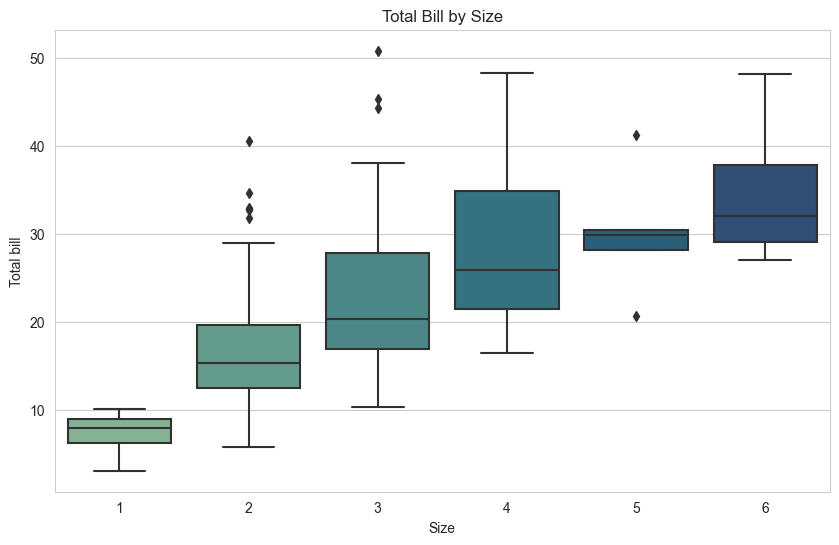

In [412]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df,
            x="Size",
            y="Total_bill",
            palette=sns.color_palette("crest"))
plt.title("Total Bill by Size")
plt.ylabel("Total bill")

### Modeling

#### Data partition

In [413]:
X = df.drop("Total_bill",axis=1)
y = df["Total_bill"]
X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.65)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {X_test.shape}')

X_train shape: (158, 7)
X_test shape: (86, 7)
y_train shape: (158,)
y_test shape: (86, 7)


#### Modifying y_train and y_test to make the variable normally distributed

In [414]:
print(f'Y_train shapiro test: {shapiro(y_train)}')
print(f'Natural log of Y_train shapiro test: {shapiro(np.log(y_train))}')

Y_train shapiro test: ShapiroResult(statistic=0.8996512293815613, pvalue=6.431001065010378e-09)
Natural log of Y_train shapiro test: ShapiroResult(statistic=0.984550416469574, pvalue=0.07570667564868927)


In [415]:
y_train = y_train.apply(lambda x: np.log(x))
y_test = y_test.apply(lambda x: np.log(x))

#### Getting dummy variables

In [416]:
X_train = pd.get_dummies(data=X_train,columns=["Sex","Smoker","Day_of_week","Time"],drop_first=True)
X_test = pd.get_dummies(data=X_test,columns=["Sex","Smoker","Day_of_week","Time"],drop_first=True)

In [417]:
X_train.shape

(158, 9)

In [418]:
X_test.shape

(86, 9)

#### Model output

In [419]:
lm_mod = sm.OLS(y_train,X_train).fit()
print(lm_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_bill   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     27.18
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.24e-25
Time:                        22:28:13   Log-Likelihood:                -24.535
No. Observations:                 158   AIC:                             67.07
Df Residuals:                     149   BIC:                             94.63
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.8231 

#### Improving the model - unselecting variables

In [420]:
X_train = X_train.loc[:,~X_train.columns.isin(["Day_of_week_Saturday","Day_of_week_Sunday","Day_of_week_Thursday"])]
X_test = X_test.loc[:,~X_test.columns.isin(["Day_of_week_Saturday","Day_of_week_Sunday","Day_of_week_Thursday"])]

In [421]:
lm_mod = sm.OLS(y_train,X_train).fit()
print(lm_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_bill   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     43.29
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.39e-27
Time:                        22:28:24   Log-Likelihood:                -25.668
No. Observations:                 158   AIC:                             63.34
Df Residuals:                     152   BIC:                             81.71
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8874      0.082     22.905      0.0

#### Prediction for the test set

In [429]:
test_pred = lm_mod.predict(X_test)
residuals = y_test - test_pred
std_scaler = StandardScaler()
standarized_residuals = std_scaler.fit_transform(np.array(residuals).reshape(-1,1))

#### MAE and MAPE metrics

In [450]:
print(f'MAE: {round(mean_absolute_error(y_true = y_test, y_pred = test_pred),4)}')
print(f'MAPE: {round(mean_absolute_percentage_error(y_true = y_test, y_pred = test_pred),4)}')

MAE: 0.234
MAPE: 0.0817


#### Residuals plot and standarized residuals density function plot

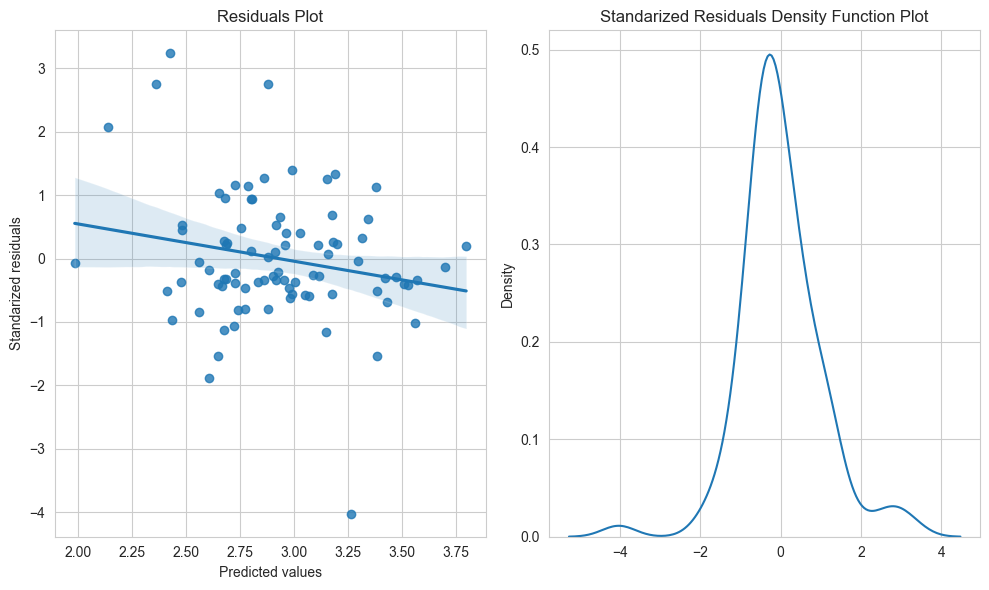

In [466]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(10,6))
axes = axes.flatten()

sns.regplot(x=np.array(test_pred),y=standarized_residuals.squeeze(),ax=axes[0])
axes[0].set_title("Residuals Plot")
axes[0].set_ylabel("Standarized residuals")
axes[0].set_xlabel("Predicted values")

sns.kdeplot(standarized_residuals.squeeze(),ax=axes[1])
axes[1].set_title("Standarized Residuals Density Function Plot")

plt.tight_layout()
plt.show()

#### Improving the model - changing the Tip variable to natural logarithm to reduce outliers in this variable

In [454]:
X_train["Tip"] = np.log(X_train["Tip"])
X_test["Tip"] = np.log(X_test["Tip"])

In [456]:
X_train

,const,Tip,Size,Sex_Male,Smoker_Yes,Time_Lunch
120,1.0,0.837248,2,1,0,1
179,1.0,1.266948,2,1,1,0
109,1.0,1.386294,2,0,1,0
176,1.0,0.693147,2,1,1,0
31,1.0,0.916291,4,1,0,0
...,...,...,...,...,...,...
200,1.0,1.386294,3,1,1,1
78,1.0,1.098612,2,1,0,1
24,1.0,1.156881,2,1,0,0
232,1.0,1.220830,2,1,0,0


#### Model output

In [460]:
lm_mod = sm.OLS(y_train,X_train).fit()
print(lm_mod.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_bill   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     52.92
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.37e-31
Time:                        22:43:03   Log-Likelihood:                -15.964
No. Observations:                 158   AIC:                             43.93
Df Residuals:                     152   BIC:                             62.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8368      0.078     23.459      0.0

#### Prediction for the test set, standarizing residuals

In [461]:
test_pred = lm_mod.predict(X_test)
residuals = y_test - test_pred
std_scaler = StandardScaler()
standarized_residuals = std_scaler.fit_transform(np.array(residuals).reshape(-1,1))

#### MAE and MAPE metrics

In [462]:
print(f'MAE: {round(mean_absolute_error(y_true = y_test, y_pred = test_pred),4)}')
print(f'MAPE: {round(mean_absolute_percentage_error(y_true = y_test, y_pred = test_pred),4)}')

MAE: 0.2274
MAPE: 0.0796


#### Residuals plot and standarized residuals density function plot

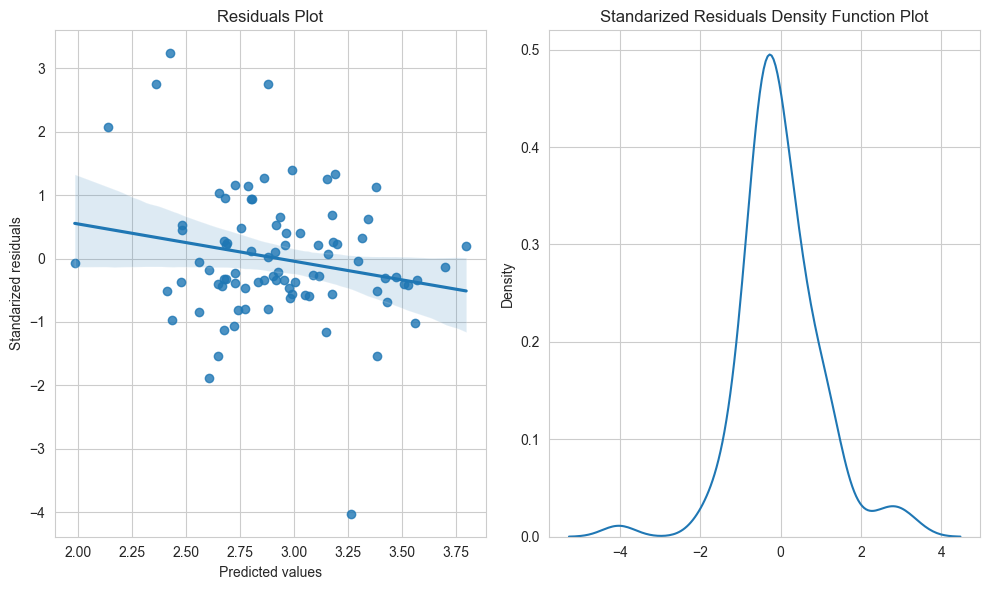

In [464]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(10,6))
axes = axes.flatten()

sns.regplot(x=np.array(test_pred),y=standarized_residuals.squeeze(),ax=axes[0])
axes[0].set_title("Residuals Plot")
axes[0].set_ylabel("Standarized residuals")
axes[0].set_xlabel("Predicted values")

sns.kdeplot(standarized_residuals.squeeze(),ax=axes[1])
axes[1].set_title("Standarized Residuals Density Function Plot")

plt.tight_layout()
plt.show()

### Conclusion:
The last model (with logarithmized Tip variable, logarithmized dependent variable and removed Day_of_week dummy variables) exhibits the highest R^2 as well as MAE and MAPE. It's residuals plots exhibits a slight down-sloped trend (it was also present in previous models), but it's likely due to the small size of the data set.